In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
print("Setup completed...")

Setup completed...


In [2]:
df = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")

In [3]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [5]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA'], dtype=object)

In [6]:
df["state"] = (
    df["state"]
    .astype(str)
    .str.strip()                 # remove leading/trailing spaces
    .str.replace(r"\s+", " ", regex=True)  # remove extra spaces
    .str.replace("&", "and")     # replace & with and
    .str.title()                 # standard casing
)

In [7]:
state_mapping = {
    "West Bangal": "West Bengal",
    "Westbengal": "West Bengal",
    "Orissa": "Odisha",
    "Pondicherry": "Puducherry",
    "Jammu And Kashmir": "Jammu and Kashmir",
    "Dadra And Nagar Haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "Daman And Diu": "Dadra and Nagar Haveli and Daman and Diu"

}
df["state"] = df["state"].replace(state_mapping)

# 3️⃣ Remove invalid state entries (example: numeric values)
df["state"] = df["state"].where(
    ~df["state"].str.isnumeric(),
    np.nan
)

# 4️⃣ Drop invalid rows
df_clean = df.dropna(subset=["state"])

print(df_clean)

              date           state          district  pincode  age_0_5  \
0       02-03-2025       Meghalaya  East Khasi Hills   793121       11   
1       09-03-2025       Karnataka   Bengaluru Urban   560043       14   
2       09-03-2025   Uttar Pradesh      Kanpur Nagar   208001       29   
3       09-03-2025   Uttar Pradesh           Aligarh   202133       62   
4       09-03-2025       Karnataka   Bengaluru Urban   560016       14   
...            ...             ...               ...      ...      ...   
499995  26-10-2025  Andhra Pradesh       Mahbubnagar   509207        1   
499996  26-10-2025  Andhra Pradesh             Medak   502220        1   
499997  26-10-2025  Andhra Pradesh             Medak   502256        0   
499998  26-10-2025  Andhra Pradesh             Medak   502286        1   
499999  26-10-2025  Andhra Pradesh           N. T. R   521402        1   

        age_5_17  age_18_greater  
0             61              37  
1             33              39  
2     

In [8]:
df_clean["state"] = df_clean["state"].replace({
    "The Dadra And Nagar Haveli And Daman And Diu":
    "Dadra And Nagar Haveli And Daman And Diu"
})
df_clean["state"] = df_clean["state"].replace("Nan", np.nan)
df_clean = df_clean.dropna(subset=["state"])


C:\Users\BAPPADITYA PAUL\AppData\Local\Temp\ipykernel_6252\870623350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["state"] = df_clean["state"].replace({
C:\Users\BAPPADITYA PAUL\AppData\Local\Temp\ipykernel_6252\870623350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["state"] = df_clean["state"].replace("Nan", np.nan)


In [9]:
df_clean['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra And Nagar Haveli And Daman And Diu', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Goa', 'Ladakh', 'Andaman And Nicobar Islands',
       'Puducherry', 'Lakshadweep',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [11]:
df_clean['age_0_5'].value_counts().sum()

np.int64(499991)

### Overall enrollment

In [15]:
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)
print(df_clean['total_aadhaar_enrolment'])
overall_total_enrolment = df["total_aadhaar_enrolment"].sum()

print("Total Aadhaar Enrolment:", overall_total_enrolment)

0         109
1          86
2         123
3         106
4          51
         ... 
499995      1
499996      1
499997      1
499998      1
499999      1
Name: total_aadhaar_enrolment, Length: 499991, dtype: int64
Total Aadhaar Enrolment: 3301026


In [16]:
df_clean.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_aadhaar_enrolment'],
      dtype='object')

In [17]:
# total enrollment per day 

daily_enrolment = (
    df.groupby("date")["total_aadhaar_enrolment"]
      .sum()
      .reset_index()
)

In [18]:
# Average Enrolment Per Day
avg_enrolment_per_day = daily_enrolment["total_aadhaar_enrolment"].mean()

print("Average Aadhaar Enrolment per Day:", avg_enrolment_per_day)

Average Aadhaar Enrolment per Day: 58946.892857142855


In [21]:
# maximum daily enrollment 
max_enrollment_day = daily_enrolment.loc[
    daily_enrolment["total_aadhaar_enrolment"].idxmax()
]

print(max_enrollment_day)
# minimum daily enrollment 
min_enrollment_day = daily_enrolment.loc[
    daily_enrolment["total_aadhaar_enrolment"].idxmin()
]

print(min_enrollment_day)

date                       01-07-2025
total_aadhaar_enrolment        616868
Name: 3, dtype: object
date                       29-03-2025
total_aadhaar_enrolment            67
Name: 53, dtype: object


####  Age-wise Analysis

In [23]:
df_clean.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_aadhaar_enrolment'],
      dtype='object')

In [26]:
# age group (0–5, 5–17, 18+) has the highest enrolment
 
print(df_clean['age_0_5'].sum())
print(df_clean['age_5_17'].sum())
print(df_clean['age_18_greater'].sum())

print("highest enrollment of group is : age 0-5", )

2020406
1157840
122767
highest enrollment of group is : age 0-5


In [29]:
#percentage of total enrolment comes from each age group

percentage_age_0_5 = (df_clean['age_0_5'].sum() / overall_total_enrolment)*100
percentage_age_5_17 = (df_clean['age_5_17'].sum() / overall_total_enrolment)*100
percentage_age_18_upper = (df_clean['age_18_greater'].sum() / overall_total_enrolment)*100

print(percentage_age_0_5)
print(percentage_age_5_17)
print(percentage_age_18_upper)

61.20539492872822
35.07515542137505
3.7190558329440604


here form the anlaysis children enrollment not lower than adult enrollment also also children enrollment highest in india...

#### State-wise Basics

In [30]:
# unique states 

df_clean['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra And Nagar Haveli And Daman And Diu', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Goa', 'Ladakh', 'Andaman And Nicobar Islands',
       'Puducherry', 'Lakshadweep',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [48]:
# highest total enrollment states 
 
state_total_enrollment = (
    df_clean.groupby("state")["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)


In [47]:
highest_total_enrollment_state = state_total_enrollment.loc[
    state_total_enrollment["total_aadhaar_enrolment"].idxmax()
]

print(highest_total_enrollment_state)

lowest_total_enrollment_state = state_total_enrollment.loc[
    state_total_enrollment["total_aadhaar_enrolment"].idxmin()
]

print(lowest_total_enrollment_state)

state                      Uttar Pradesh
total_aadhaar_enrolment           670426
Name: 34, dtype: object
state                      Lakshadweep
total_aadhaar_enrolment             93
Name: 19, dtype: object


### INTERMEDIATE (COMPARATIVE & TREND QUESTIONS)

Temporal Trends

How does Aadhaar enrolment change over time?

Is the overall trend increasing, decreasing, or stable?

Are there noticeable spikes or drops in enrolment?

In [66]:
#Convert date to Proper Datetime (MANDATORY)
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

In [67]:
# Aggregate Enrolment by Month (NOT Month Name)
monthly_enrolment = (
    df_clean
    .groupby(df_clean["date"].dt.to_period("M"))["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

In [68]:
#Convert Period to Timestamp (For Plotting)
monthly_enrolment["date"] = monthly_enrolment["date"].dt.to_timestamp()

In [69]:
#Sort by Date (CRITICAL)
monthly_enrolment = monthly_enrolment.sort_values("date")

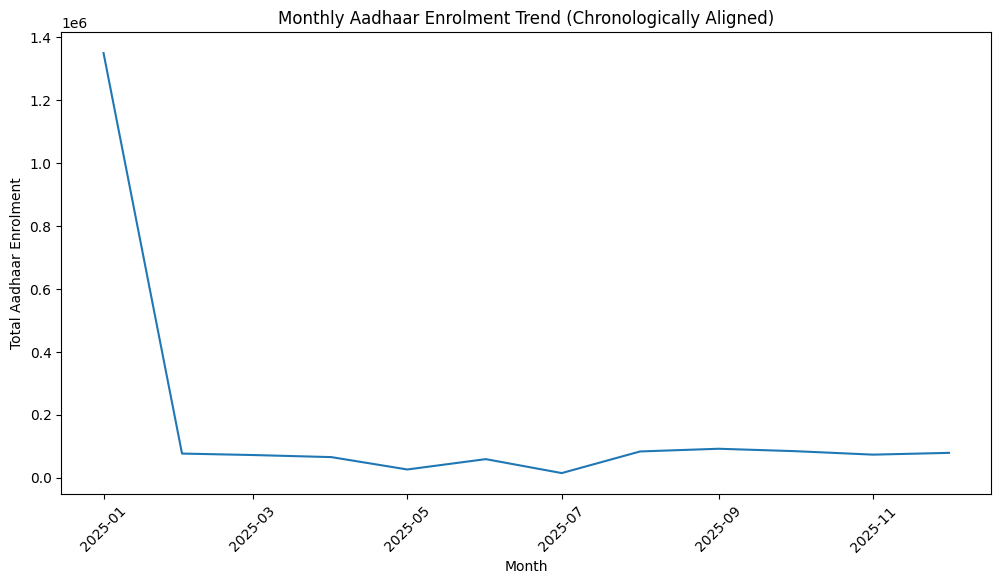

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(
    monthly_enrolment["date"],
    monthly_enrolment["total_aadhaar_enrolment"]
)
plt.xlabel("Month")
plt.ylabel("Total Aadhaar Enrolment")
plt.title("Monthly Aadhaar Enrolment Trend (Chronologically Aligned)")
plt.xticks(rotation=45)
plt.show()


The overall trend is decreasing here 
noticable spike here mid 2025-01 and 2025-03 
noticable lower point is 2025-07 and 2025-05

In [72]:
monthly_enrolment = (
    df_clean
    .groupby(df_clean["date"].dt.to_period("M"))["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

monthly_enrolment["date"] = monthly_enrolment["date"].dt.to_timestamp()
monthly_enrolment = monthly_enrolment.sort_values("date")


In [ ]:
monthly_enrolment["absolute_change"] = (
    monthly_enrolment["total_aadhaar_enrolment"].diff()
)


In [73]:
monthly_enrolment["percent_change"] = (
    monthly_enrolment["total_aadhaar_enrolment"].pct_change() * 100
)


In [74]:
spikes_drops = monthly_enrolment[
    monthly_enrolment["percent_change"].abs() > 20
]


In [75]:
spikes = spikes_drops[spikes_drops["percent_change"] > 0]
drops  = spikes_drops[spikes_drops["percent_change"] < 0]


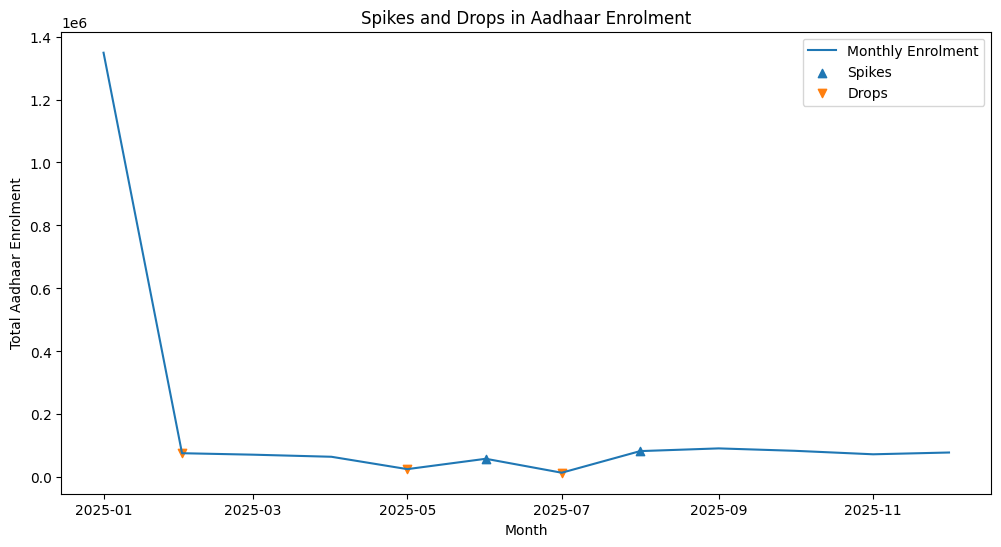

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(
    monthly_enrolment["date"],
    monthly_enrolment["total_aadhaar_enrolment"],
    label="Monthly Enrolment"
)

plt.scatter(
    spikes["date"],
    spikes["total_aadhaar_enrolment"],
    label="Spikes",
    marker="^"
)

plt.scatter(
    drops["date"],
    drops["total_aadhaar_enrolment"],
    label="Drops",
    marker="v"
)

plt.legend()
plt.title("Spikes and Drops in Aadhaar Enrolment")
plt.xlabel("Month")
plt.ylabel("Total Aadhaar Enrolment")
plt.show()


Monthly / Seasonal Patterns

In [79]:
# Are Aadhaar Enrolment Spikes Consistent Across Years?

df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

df_clean["year"] = df_clean["date"].dt.year
df_clean["month"] = df_clean["date"].dt.month

monthly_yearly = (
    df_clean
    .groupby(["year", "month"])["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)
monthly_yearly["percent_change"] = (
    monthly_yearly
    .groupby("year")["total_aadhaar_enrolment"]
    .pct_change() * 100
)
spike_months = monthly_yearly[
    monthly_yearly["percent_change"].abs() > 20
]
consistent_spike_months = (
    spike_months.groupby("month")["year"]
    .nunique()
    .reset_index(name="num_years_with_spike")
    .sort_values("num_years_with_spike", ascending=False)
)
print(monthly_yearly)
print(monthly_yearly["percent_change"])
print(spike_months)
print(consistent_spike_months)
print(df_clean["date"])
print(df_clean["year"])
print(df_clean["month"])

      year  month  total_aadhaar_enrolment  percent_change
0   2025.0    1.0                  1348645             NaN
1   2025.0    2.0                    76602      -94.320077
2   2025.0    3.0                    71987       -6.024647
3   2025.0    4.0                    65349       -9.221109
4   2025.0    5.0                    26069      -60.108035
5   2025.0    6.0                    58957      126.157505
6   2025.0    7.0                    14658      -75.137812
7   2025.0    8.0                    83352      468.645108
8   2025.0    9.0                    91911       10.268500
9   2025.0   10.0                    84300       -8.280837
10  2025.0   11.0                    73204      -13.162515
11  2025.0   12.0                    78858        7.723622
0            NaN
1     -94.320077
2      -6.024647
3      -9.221109
4     -60.108035
5     126.157505
6     -75.137812
7     468.645108
8      10.268500
9      -8.280837
10    -13.162515
11      7.723622
Name: percent_change, dtype: 

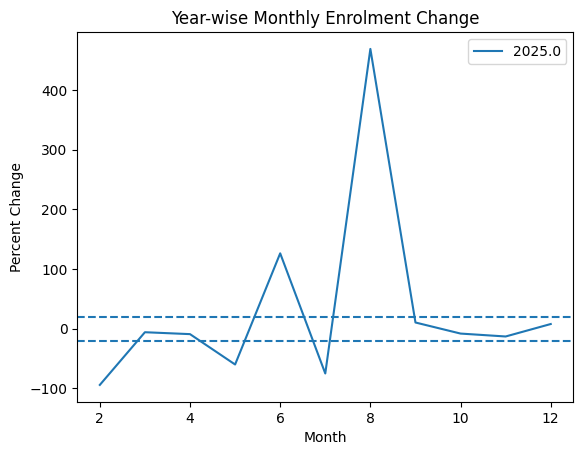

In [80]:
import matplotlib.pyplot as plt

for y in monthly_yearly["year"].unique():
    yearly_data = monthly_yearly[monthly_yearly["year"] == y]
    plt.plot(
        yearly_data["month"],
        yearly_data["percent_change"],
        label=str(y)
    )

plt.axhline(20, linestyle="--")
plt.axhline(-20, linestyle="--")
plt.xlabel("Month")
plt.ylabel("Percent Change")
plt.title("Year-wise Monthly Enrolment Change")
plt.legend()
plt.show()


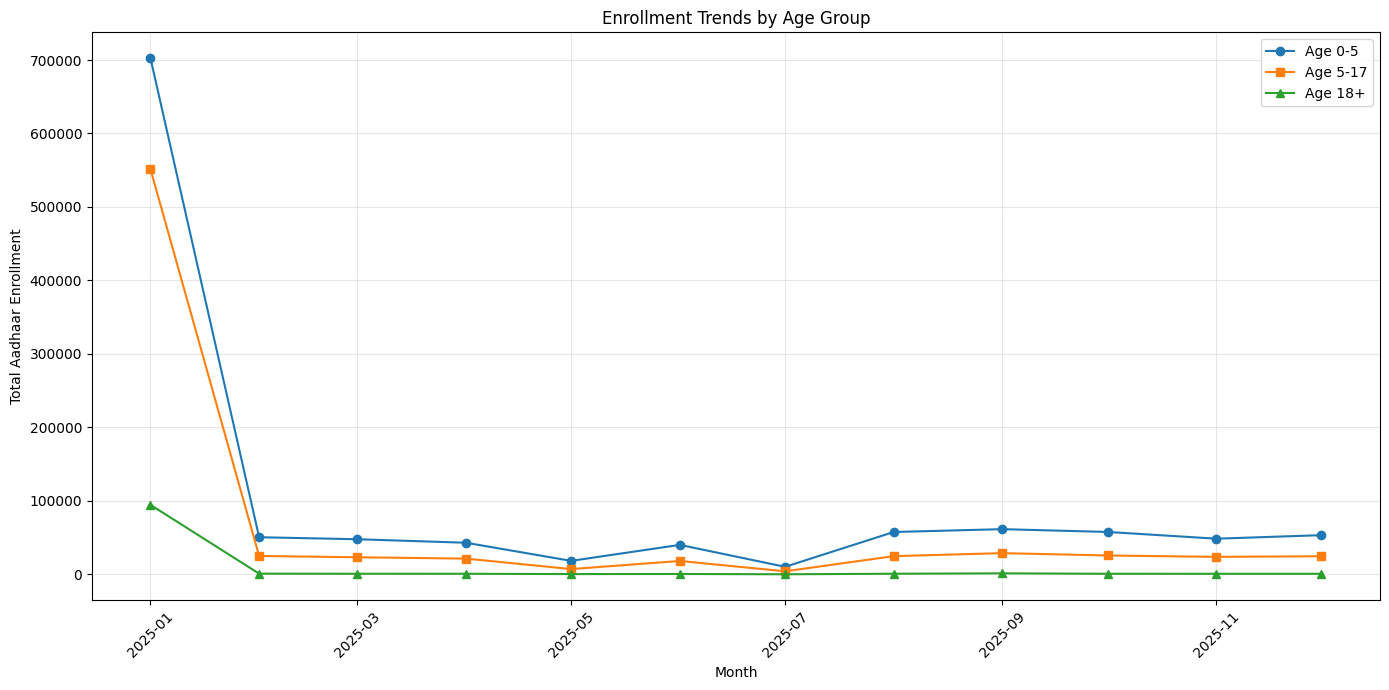

         date  age_0_5  age_5_17  age_18_greater  pct_change_0_5  \
0  2025-01-01   702546    551462           94637             NaN   
1  2025-02-01    50561     25059             982      -92.803176   
2  2025-03-01    47843     23301             843       -5.375685   
3  2025-04-01    43057     21463             829      -10.003553   
4  2025-05-01    18400      7238             431      -57.265950   
5  2025-06-01    40158     18244             555      118.250000   
6  2025-07-01    10305      4197             156      -74.338861   
7  2025-08-01    57659     24816             877      459.524503   
8  2025-09-01    61552     28915            1444        6.751765   
9  2025-10-01    57752     25725             823       -6.173642   
10 2025-11-01    48577     23835             792      -15.886896   
11 2025-12-01    53360     24703             795        9.846224   

    pct_change_5_17  pct_change_18_greater  
0               NaN                    NaN  
1        -95.455897      

In [81]:
# Age Group Enrollment Trends Over Time

# Convert date to datetime if not already done
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

# Aggregate by month for each age group
monthly_age_trends = (
    df_clean
    .groupby(df_clean["date"].dt.to_period("M"))[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
    .reset_index()
)

# Convert period to timestamp for plotting
monthly_age_trends["date"] = monthly_age_trends["date"].dt.to_timestamp()
monthly_age_trends = monthly_age_trends.sort_values("date")

# Plot comparison of all age groups
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(monthly_age_trends["date"], monthly_age_trends["age_0_5"], label="Age 0-5", marker="o")
plt.plot(monthly_age_trends["date"], monthly_age_trends["age_5_17"], label="Age 5-17", marker="s")
plt.plot(monthly_age_trends["date"], monthly_age_trends["age_18_greater"], label="Age 18+", marker="^")

plt.xlabel("Month")
plt.ylabel("Total Aadhaar Enrollment")
plt.title("Enrollment Trends by Age Group")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate percent change for each age group
monthly_age_trends["pct_change_0_5"] = monthly_age_trends["age_0_5"].pct_change() * 100
monthly_age_trends["pct_change_5_17"] = monthly_age_trends["age_5_17"].pct_change() * 100
monthly_age_trends["pct_change_18_greater"] = monthly_age_trends["age_18_greater"].pct_change() * 100

print(monthly_age_trends)

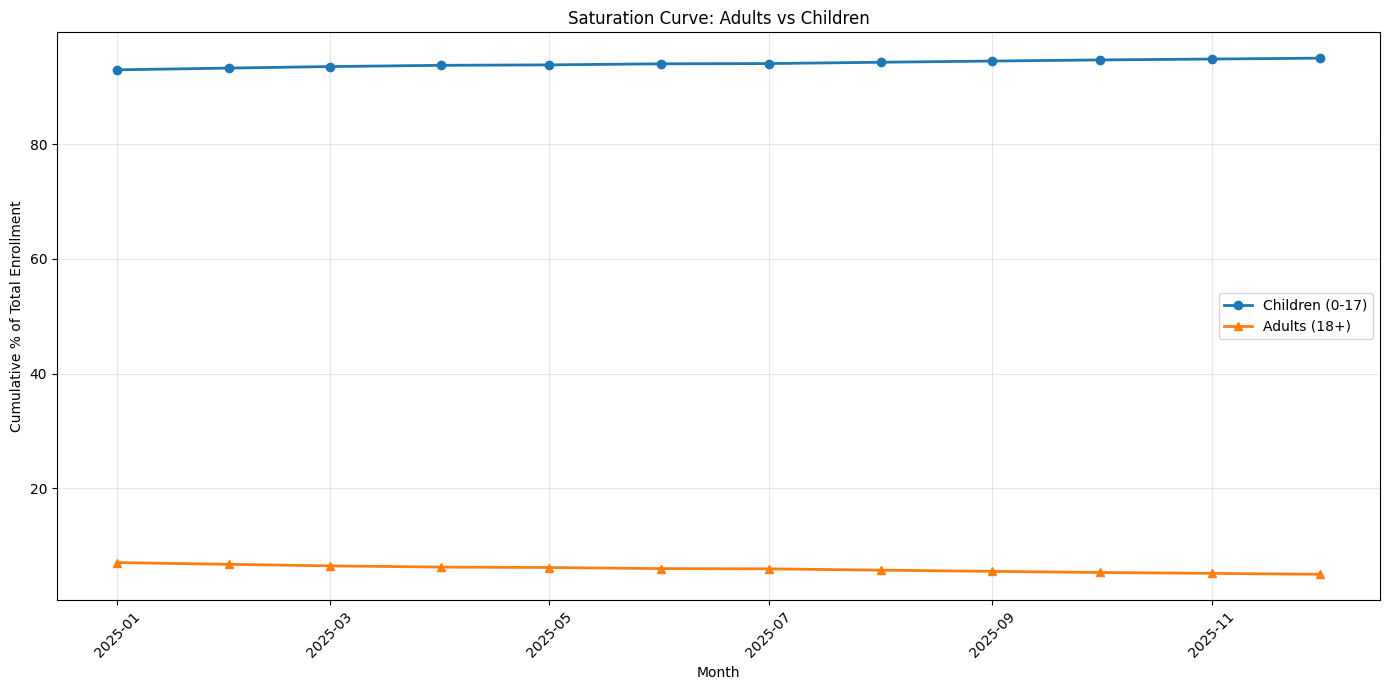

=== Saturation Analysis ===
         date  cum_pct_children  cum_pct_18_greater  growth_rate_children  \
0  2025-01-01         92.982809            7.017191                   NaN   
1  2025-02-01         93.291058            6.708942            -93.969735   
2  2025-03-01         93.557320            6.442680             -5.919069   
3  2025-04-01         93.773707            6.226293             -9.310694   
4  2025-05-01         93.848747            6.151253            -60.263484   
5  2025-06-01         94.035175            5.964825            127.794680   
6  2025-07-01         94.078388            5.921612            -75.168659   
7  2025-08-01         94.310901            5.689099            468.714660   
8  2025-09-01         94.516879            5.483121              9.690209   
9  2025-10-01         94.714569            5.285431             -7.726574   
10 2025-11-01         94.868809            5.131191            -13.255148   
11 2025-12-01         95.025585            4.974

In [82]:
# Adult vs Child Enrollment Saturation Analysis

# Calculate cumulative enrollment for each age group
monthly_age_trends["cumsum_0_5"] = monthly_age_trends["age_0_5"].cumsum()
monthly_age_trends["cumsum_5_17"] = monthly_age_trends["age_5_17"].cumsum()
monthly_age_trends["cumsum_18_greater"] = monthly_age_trends["age_18_greater"].cumsum()

# Calculate total cumulative for percentage calculation
monthly_age_trends["total_cumsum"] = (
    monthly_age_trends["cumsum_0_5"] + 
    monthly_age_trends["cumsum_5_17"] + 
    monthly_age_trends["cumsum_18_greater"]
)

# Calculate cumulative percentage of total enrollment
monthly_age_trends["cum_pct_0_5"] = (monthly_age_trends["cumsum_0_5"] / monthly_age_trends["total_cumsum"]) * 100
monthly_age_trends["cum_pct_5_17"] = (monthly_age_trends["cumsum_5_17"] / monthly_age_trends["total_cumsum"]) * 100
monthly_age_trends["cum_pct_18_greater"] = (monthly_age_trends["cumsum_18_greater"] / monthly_age_trends["total_cumsum"]) * 100

# Combine child enrollment (0-5 + 5-17)
monthly_age_trends["cumsum_children"] = monthly_age_trends["cumsum_0_5"] + monthly_age_trends["cumsum_5_17"]
monthly_age_trends["cum_pct_children"] = (monthly_age_trends["cumsum_children"] / monthly_age_trends["total_cumsum"]) * 100

# Plot saturation curves
plt.figure(figsize=(14, 7))
plt.plot(monthly_age_trends["date"], monthly_age_trends["cum_pct_children"], label="Children (0-17)", marker="o", linewidth=2)
plt.plot(monthly_age_trends["date"], monthly_age_trends["cum_pct_18_greater"], label="Adults (18+)", marker="^", linewidth=2)

plt.xlabel("Month")
plt.ylabel("Cumulative % of Total Enrollment")
plt.title("Saturation Curve: Adults vs Children")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate growth rate slowdown
monthly_age_trends["growth_rate_children"] = monthly_age_trends["age_0_5"].add(monthly_age_trends["age_5_17"]).pct_change() * 100
monthly_age_trends["growth_rate_adults"] = monthly_age_trends["age_18_greater"].pct_change() * 100

print("=== Saturation Analysis ===")
print(monthly_age_trends[["date", "cum_pct_children", "cum_pct_18_greater", "growth_rate_children", "growth_rate_adults"]])

# Identify saturation point (when growth rate stabilizes near zero)
print("\nFinal cumulative percentages:")
print(f"Children: {monthly_age_trends['cum_pct_children'].iloc[-1]:.2f}%")
print(f"Adults: {monthly_age_trends['cum_pct_18_greater'].iloc[-1]:.2f}%")

State Comparisons

=== State Enrollment Distribution Analysis ===

Gini Coefficient: -0.6700 (0=equal, 1=unequal)
Coefficient of Variation: 152.00%
Mean Enrollment per State: 89,217
Median Enrollment per State: 48,964
Std Dev: 135,607

Top 10 States:
         state  total_aadhaar_enrolment  percentage
 Uttar Pradesh                   670426   20.309705
         Bihar                   390901   11.841850
Madhya Pradesh                   277081    8.393817
   West Bengal                   222284    6.733812
   Maharashtra                   222030    6.726117
     Rajasthan                   205699    6.231390
       Gujarat                   193313    5.856172
         Assam                   167163    5.063991
     Karnataka                   121762    3.688625
    Tamil Nadu                   105582    3.198473

Bottom 10 States:
                                   state  total_aadhaar_enrolment  percentage
                       Arunachal Pradesh                     2876    0.087125
                     

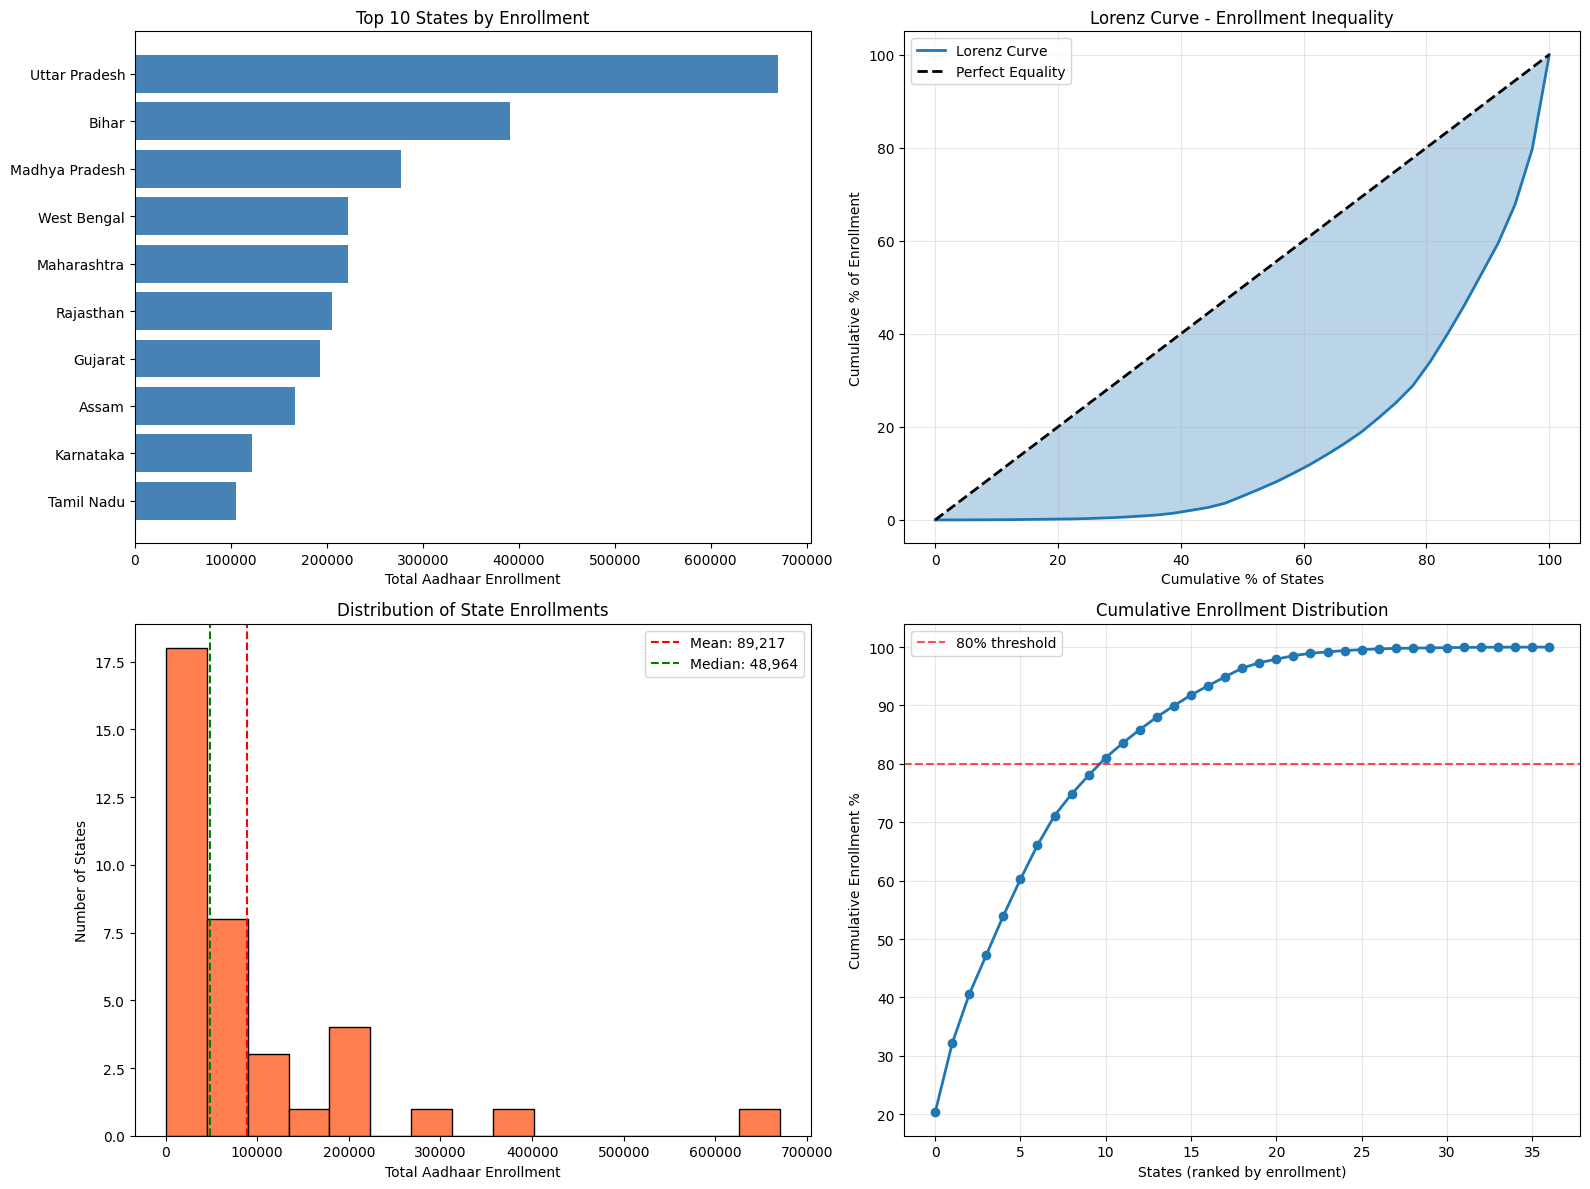


80/20 Rule: 24 states account for 80% of enrollment
Out of 37 total states (64.9%)


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate state-wise enrollment statistics
state_enrollment = (
    df_clean.groupby("state")["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
    .sort_values("total_aadhaar_enrolment", ascending=False)
)

# Calculate distribution metrics
total_enrollment = state_enrollment["total_aadhaar_enrolment"].sum()
state_enrollment["percentage"] = (state_enrollment["total_aadhaar_enrolment"] / total_enrollment) * 100
state_enrollment["cumulative_percentage"] = state_enrollment["percentage"].cumsum()

# Gini coefficient (0 = equal, 1 = unequal)
sorted_enrollment = np.sort(state_enrollment["total_aadhaar_enrolment"].values)
n = len(sorted_enrollment)
cumsum = np.cumsum(sorted_enrollment)
gini = (2 * np.sum((n + 1 - np.arange(1, n + 1)) * sorted_enrollment)) / (n * cumsum[-1]) - (n + 1) / n

# Standard deviation and coefficient of variation
std_dev = state_enrollment["total_aadhaar_enrolment"].std()
mean_enrollment = state_enrollment["total_aadhaar_enrolment"].mean()
cv = (std_dev / mean_enrollment) * 100

print("=== State Enrollment Distribution Analysis ===\n")
print(f"Gini Coefficient: {gini:.4f} (0=equal, 1=unequal)")
print(f"Coefficient of Variation: {cv:.2f}%")
print(f"Mean Enrollment per State: {mean_enrollment:,.0f}")
print(f"Median Enrollment per State: {state_enrollment['total_aadhaar_enrolment'].median():,.0f}")
print(f"Std Dev: {std_dev:,.0f}\n")

# Show top and bottom states
print("Top 10 States:")
print(state_enrollment.head(10)[["state", "total_aadhaar_enrolment", "percentage"]].to_string(index=False))
print("\nBottom 10 States:")
print(state_enrollment.tail(10)[["state", "total_aadhaar_enrolment", "percentage"]].to_string(index=False))

# Visualization - Bar chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top states bar chart
ax1 = axes[0, 0]
top_10 = state_enrollment.head(10)
ax1.barh(top_10["state"], top_10["total_aadhaar_enrolment"], color="steelblue")
ax1.set_xlabel("Total Aadhaar Enrollment")
ax1.set_title("Top 10 States by Enrollment")
ax1.invert_yaxis()

# Lorenz curve (shows inequality)
ax2 = axes[0, 1]
sorted_pct = (sorted_enrollment / total_enrollment) * 100
cumsum_pct = np.cumsum(sorted_pct)
population_pct = np.linspace(0, 100, len(cumsum_pct))

ax2.plot(population_pct, cumsum_pct, label="Lorenz Curve", linewidth=2)
ax2.plot([0, 100], [0, 100], "k--", label="Perfect Equality", linewidth=2)
ax2.fill_between(population_pct, cumsum_pct, population_pct, alpha=0.3)
ax2.set_xlabel("Cumulative % of States")
ax2.set_ylabel("Cumulative % of Enrollment")
ax2.set_title("Lorenz Curve - Enrollment Inequality")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Distribution histogram
ax3 = axes[1, 0]
ax3.hist(state_enrollment["total_aadhaar_enrolment"], bins=15, color="coral", edgecolor="black")
ax3.axvline(mean_enrollment, color="red", linestyle="--", label=f"Mean: {mean_enrollment:,.0f}")
ax3.axvline(state_enrollment["total_aadhaar_enrolment"].median(), color="green", linestyle="--", label=f"Median: {state_enrollment['total_aadhaar_enrolment'].median():,.0f}")
ax3.set_xlabel("Total Aadhaar Enrollment")
ax3.set_ylabel("Number of States")
ax3.set_title("Distribution of State Enrollments")
ax3.legend()

# Cumulative percentage plot
ax4 = axes[1, 1]
ax4.plot(range(len(state_enrollment)), state_enrollment["cumulative_percentage"], marker="o", linewidth=2)
ax4.axhline(80, color="red", linestyle="--", alpha=0.7, label="80% threshold")
ax4.set_xlabel("States (ranked by enrollment)")
ax4.set_ylabel("Cumulative Enrollment %")
ax4.set_title("Cumulative Enrollment Distribution")
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Calculate 80/20 rule (Pareto principle)
states_for_80_percent = (state_enrollment["cumulative_percentage"] >= 80).idxmax() + 1
print(f"\n80/20 Rule: {states_for_80_percent} states account for 80% of enrollment")
print(f"Out of {len(state_enrollment)} total states ({(states_for_80_percent/len(state_enrollment)*100):.1f}%)")

States contributing ~50% of enrolments: 4
States contributing ~80% of enrolments: 10

Top contributing states:
            state  total_aadhaar_enrolment  percentage_share  cumulative_share
0   Uttar Pradesh                   670426         20.309705         20.309705
1           Bihar                   390901         11.841850         32.151555
2  Madhya Pradesh                   277081          8.393817         40.545372
3     West Bengal                   222284          6.733812         47.279184
4     Maharashtra                   222030          6.726117         54.005301
5       Rajasthan                   205699          6.231390         60.236691
6         Gujarat                   193313          5.856172         66.092863
7           Assam                   167163          5.063991         71.156854
8       Karnataka                   121762          3.688625         74.845479
9      Tamil Nadu                   105582          3.198473         78.043952


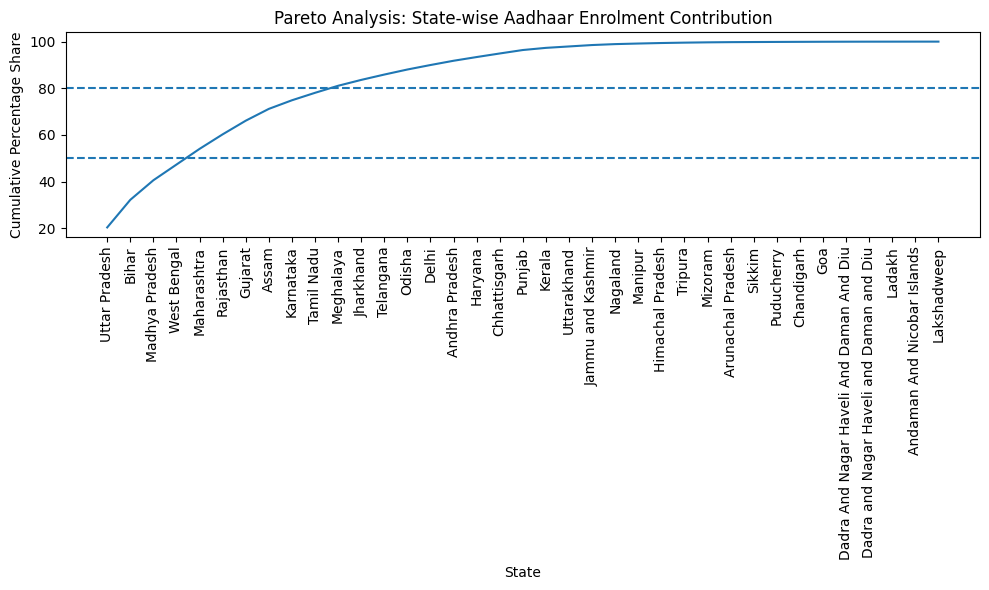

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Basic cleaning safeguards
# -----------------------------
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df_clean[age_cols] = (
    df_clean[age_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)

# -----------------------------
# 2. Total Aadhaar enrolment
# -----------------------------
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)

# -----------------------------
# 3. State-wise total enrolment
# -----------------------------
state_total = (
    df_clean
    .groupby("state")["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

# -----------------------------
# 4. Percentage & cumulative share
# -----------------------------
total_all_states = state_total["total_aadhaar_enrolment"].sum()

state_total["percentage_share"] = (
    state_total["total_aadhaar_enrolment"] / total_all_states
) * 100

state_total = (
    state_total
    .sort_values("percentage_share", ascending=False)
    .reset_index(drop=True)
)

state_total["cumulative_share"] = state_total["percentage_share"].cumsum()

# -----------------------------
# 5. Concentration insight
# -----------------------------
top_50_states = state_total[state_total["cumulative_share"] <= 50]
top_80_states = state_total[state_total["cumulative_share"] <= 80]

print("States contributing ~50% of enrolments:", len(top_50_states))
print("States contributing ~80% of enrolments:", len(top_80_states))

print("\nTop contributing states:")
print(state_total.head(10))

# -----------------------------
# 6. Pareto curve visualization
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(
    state_total["state"],
    state_total["cumulative_share"]
)
plt.axhline(50, linestyle="--")
plt.axhline(80, linestyle="--")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Cumulative Percentage Share")
plt.title("Pareto Analysis: State-wise Aadhaar Enrolment Contribution")
plt.tight_layout()
plt.show()


In [85]:
import pandas as pd

# ---------------------------------
# 1. Ensure correct data types
# ---------------------------------
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df_clean[age_cols] = (
    df_clean[age_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)

# ---------------------------------
# 2. Create total enrolment column
# ---------------------------------
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)

# ---------------------------------
# 3. Daily enrolment per state
# ---------------------------------
state_daily_enrolment = (
    df_clean
    .groupby(["state", "date"])["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

# ---------------------------------
# 4. Average enrolment per state
# ---------------------------------
average_enrolment_per_state = (
    state_daily_enrolment
    .groupby("state")["total_aadhaar_enrolment"]
    .mean()
    .reset_index(name="average_daily_enrolment")
)

# ---------------------------------
# 5. Display result
# ---------------------------------
print(average_enrolment_per_state.sort_values(
    by="average_daily_enrolment",
    ascending=False
))


                                       state  average_daily_enrolment
34                             Uttar Pradesh             27088.411765
4                                      Bihar             14502.823529
20                            Madhya Pradesh             10499.705882
11                                   Gujarat              9216.375000
3                                      Assam              8042.937500
21                               Maharashtra              7977.352941
29                                 Rajasthan              7001.941176
36                               West Bengal              6923.470588
23                                 Meghalaya              5337.823529
16                                 Karnataka              4496.000000
9                                      Delhi              2839.882353
15                                 Jharkhand              2839.533333
31                                Tamil Nadu              2494.687500
32                  

District-Level

In [87]:
import pandas as pd

# ---------------------------------
# 1. Safety checks: date & numeric
# ---------------------------------
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df_clean[age_cols] = (
    df_clean[age_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)

# ---------------------------------
# 2. Total Aadhaar enrolment
# ---------------------------------
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)

# ---------------------------------
# 3. Total enrolment per district
# ---------------------------------
district_total = (
    df_clean
    .groupby(["state", "district"])["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

# ---------------------------------
# 4. Highest & Lowest enrolment districts (India-level)
# ---------------------------------
highest_district = district_total.loc[
    district_total["total_aadhaar_enrolment"].idxmax()
]

lowest_district = district_total.loc[
    district_total["total_aadhaar_enrolment"].idxmin()
]

print("District with HIGHEST enrolment:")
print(highest_district)

print("\nDistrict with LOWEST enrolment:")
print(lowest_district)

# ---------------------------------
# 5. District dominance within state
# ---------------------------------
# State total enrolment
state_total = (
    district_total
    .groupby("state")["total_aadhaar_enrolment"]
    .sum()
    .reset_index(name="state_total_enrolment")
)

# Merge state totals back
district_total = district_total.merge(
    state_total,
    on="state",
    how="left"
)

# Contribution percentage of each district within its state
district_total["district_share_percent"] = (
    district_total["total_aadhaar_enrolment"] /
    district_total["state_total_enrolment"]
) * 100

# ---------------------------------
# 6. Find dominant districts (example: >30% of state enrolment)
# ---------------------------------
dominant_districts = district_total[
    district_total["district_share_percent"] > 30
].sort_values(
    by="district_share_percent",
    ascending=False
)

print("\nDistricts dominating enrolment within their state (>30% share):")
print("dominated district",dominant_districts)


District with HIGHEST enrolment:
state                          Bihar
district                   Sitamarhi
total_aadhaar_enrolment        34278
Name: 160, dtype: object

District with LOWEST enrolment:
state                      Andaman And Nicobar Islands
district                                      Nicobars
total_aadhaar_enrolment                              1
Name: 2, dtype: object

Districts dominating enrolment within their state (>30% share):
dominated district                                         state                district  \
444                               Lakshadweep             Lakshadweep   
165                                Chandigarh              Chandigarh   
207  Dadra And Nagar Haveli And Daman And Diu  Dadra And Nagar Haveli   
212  Dadra and Nagar Haveli and Daman and Diu  Dadra and Nagar Haveli   
442                                    Ladakh                  Kargil   
230                                       Goa               North Goa   
560            

ADVANCED (PATTERNS, ANOMALIES, INDICATORS)

In [88]:
import pandas as pd
import numpy as np

# ---------------------------------
# 1. Safety checks
# ---------------------------------
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df_clean[age_cols] = (
    df_clean[age_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)

# ---------------------------------
# 2. Total Aadhaar enrolment
# ---------------------------------
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)

# =====================================================
# QUESTION 1 & 2: DAILY ANOMALIES (HIGH / LOW / ZERO)
# =====================================================

# Daily total enrolment (India-level)
daily_enrolment = (
    df_clean
    .groupby("date")["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
    .sort_values("date")
)

# Use IQR method (robust anomaly detection)
Q1 = daily_enrolment["total_aadhaar_enrolment"].quantile(0.25)
Q3 = daily_enrolment["total_aadhaar_enrolment"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# High-enrolment anomaly days
high_anomaly_days = daily_enrolment[
    daily_enrolment["total_aadhaar_enrolment"] > upper_bound
]

# Low / zero-enrolment anomaly days
low_anomaly_days = daily_enrolment[
    (daily_enrolment["total_aadhaar_enrolment"] < lower_bound) |
    (daily_enrolment["total_aadhaar_enrolment"] == 0)
]

print("Unusually HIGH enrolment days:")
print(high_anomaly_days)

print("\nUnusually LOW or ZERO enrolment days:")
print(low_anomaly_days)

# =====================================================
# QUESTION 3: STATE-LEVEL SUDDEN SPIKES
# =====================================================

# State-wise daily enrolment
state_daily = (
    df_clean
    .groupby(["state", "date"])["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
    .sort_values(["state", "date"])
)

# Day-to-day percent change within each state
state_daily["percent_change"] = (
    state_daily
    .groupby("state")["total_aadhaar_enrolment"]
    .pct_change() * 100
)

# Sudden spikes not seen elsewhere (example threshold: >50%)
state_spikes = state_daily[
    state_daily["percent_change"].abs() > 50
]

print("\nState-level sudden spikes (>50% day-to-day change):")
print(state_spikes)


Unusually HIGH enrolment days:
        date  total_aadhaar_enrolment
0 2025-01-04                   257438
1 2025-01-05                   183616
2 2025-01-06                   215734
3 2025-01-07                   616868

Unusually LOW or ZERO enrolment days:
         date  total_aadhaar_enrolment
5  2025-02-03                      109
11 2025-07-09                    14658
13 2025-09-03                     3404

State-level sudden spikes (>50% day-to-day change):
                           state       date  total_aadhaar_enrolment  \
1    Andaman And Nicobar Islands 2025-02-09                       10   
4    Andaman And Nicobar Islands 2025-05-09                        5   
5    Andaman And Nicobar Islands 2025-08-09                       13   
12                Andhra Pradesh 2025-01-09                     2254   
16                Andhra Pradesh 2025-05-09                      778   
..                           ...        ...                      ...   
538                  West B

In [89]:
import pandas as pd
import numpy as np

# ---------------------------------
# 1. Safety checks
# ---------------------------------
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df_clean[age_cols] = (
    df_clean[age_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)

# ---------------------------------
# 2. Total Aadhaar enrolment
# ---------------------------------
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)

# =====================================================
# QUESTION 1: How many unique PIN codes?
# =====================================================
unique_pincodes = df_clean["pincode"].nunique()
print("Number of unique PIN codes:", unique_pincodes)

# =====================================================
# Aggregate enrolment per PIN code (core step)
# =====================================================
pincode_total = (
    df_clean
    .groupby("pincode")["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

# =====================================================
# QUESTION 2: PIN codes with ZERO enrolment
# =====================================================
zero_enrolment_pincodes = pincode_total[
    pincode_total["total_aadhaar_enrolment"] == 0
]

print("\nPIN codes with ZERO enrolment:")
print(zero_enrolment_pincodes)

# =====================================================
# QUESTION 3: PIN codes with EXTREMELY LOW enrolment
# (Using IQR-based anomaly detection)
# =====================================================
Q1 = pincode_total["total_aadhaar_enrolment"].quantile(0.25)
Q3 = pincode_total["total_aadhaar_enrolment"].quantile(0.75)
IQR = Q3 - Q1

low_threshold = Q1 - 1.5 * IQR

low_enrolment_pincodes = pincode_total[
    (pincode_total["total_aadhaar_enrolment"] > 0) &
    (pincode_total["total_aadhaar_enrolment"] < low_threshold)
]

print("\nPIN codes with EXTREMELY LOW enrolment:")
print(low_enrolment_pincodes)


Number of unique PIN codes: 19301

PIN codes with ZERO enrolment:
Empty DataFrame
Columns: [pincode, total_aadhaar_enrolment]
Index: []

PIN codes with EXTREMELY LOW enrolment:
Empty DataFrame
Columns: [pincode, total_aadhaar_enrolment]
Index: []


In [90]:
import pandas as pd

# ---------------------------------
# 1. Ensure numeric enrolment columns
# ---------------------------------
age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df_clean[age_cols] = (
    df_clean[age_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)

# ---------------------------------
# 2. Compute total Aadhaar enrolment
# ---------------------------------
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)

# ---------------------------------
# 3. Aggregate enrolment per PIN code
# ---------------------------------
pincode_total = (
    df_clean
    .groupby("pincode")["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

# ---------------------------------
# 4. Identify PIN codes with ZERO enrolment
# ---------------------------------
zero_enrolment_pincodes = pincode_total[
    pincode_total["total_aadhaar_enrolment"] == 0
]

print("Number of PIN codes with ZERO enrolment:", len(zero_enrolment_pincodes))
print("\nPIN codes with ZERO enrolment:")
print(zero_enrolment_pincodes)


Number of PIN codes with ZERO enrolment: 0

PIN codes with ZERO enrolment:
Empty DataFrame
Columns: [pincode, total_aadhaar_enrolment]
Index: []


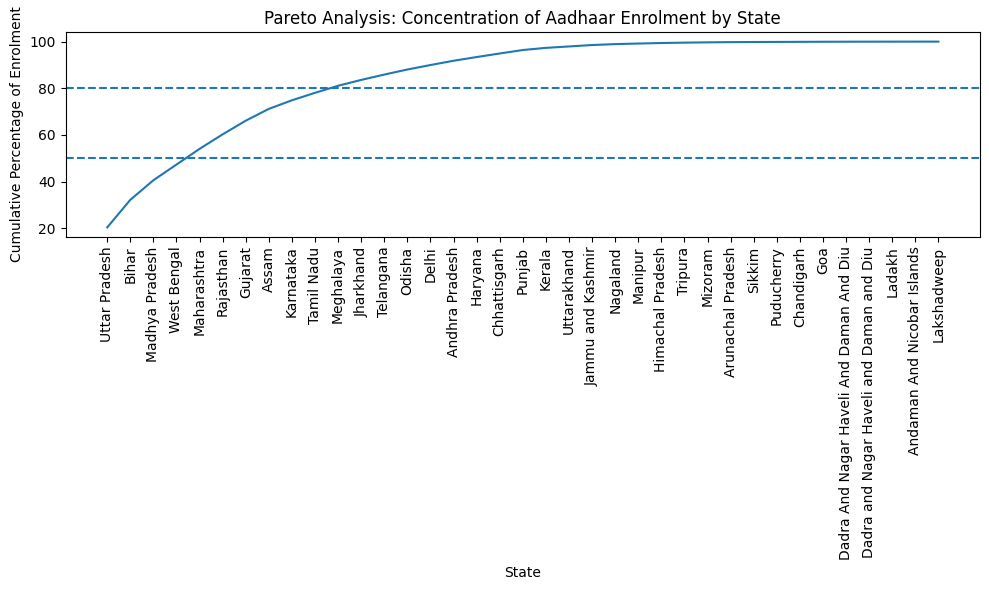

In [91]:
import matplotlib.pyplot as plt

# State-wise total enrolment
state_total = (
    df_clean.groupby("state")["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

# Percentage & cumulative share
total_all = state_total["total_aadhaar_enrolment"].sum()
state_total["percentage_share"] = (
    state_total["total_aadhaar_enrolment"] / total_all
) * 100

state_total = (
    state_total
    .sort_values("percentage_share", ascending=False)
    .reset_index(drop=True)
)

state_total["cumulative_share"] = state_total["percentage_share"].cumsum()

# Plot Pareto curve
plt.figure(figsize=(10,6))
plt.plot(
    state_total["state"],
    state_total["cumulative_share"]
)
plt.axhline(80, linestyle="--")
plt.axhline(50, linestyle="--")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Cumulative Percentage of Enrolment")
plt.title("Pareto Analysis: Concentration of Aadhaar Enrolment by State")
plt.tight_layout()
plt.show()


In [92]:
import pandas as pd
import numpy as np

# -------------------------------------------------
# 1. Safety checks
# -------------------------------------------------
df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df_clean[age_cols] = (
    df_clean[age_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
)

# -------------------------------------------------
# 2. Total and child enrolment
# -------------------------------------------------
df_clean["total_aadhaar_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"] +
    df_clean["age_18_greater"]
)

df_clean["child_enrolment"] = (
    df_clean["age_0_5"] +
    df_clean["age_5_17"]
)

# =================================================
# Q1: Districts that CONSISTENTLY show LOW enrolment
# =================================================

# Daily enrolment per district
district_daily = (
    df_clean
    .groupby(["state", "district", "date"])["total_aadhaar_enrolment"]
    .sum()
    .reset_index()
)

# Average daily enrolment per district
district_avg = (
    district_daily
    .groupby(["state", "district"])["total_aadhaar_enrolment"]
    .mean()
    .reset_index(name="avg_daily_enrolment")
)

# Define low-enrolment threshold (bottom 25%)
low_threshold = district_avg["avg_daily_enrolment"].quantile(0.25)

low_enrolment_districts = district_avg[
    district_avg["avg_daily_enrolment"] <= low_threshold
]

print("Consistently LOW-enrolment districts:")
print(low_enrolment_districts)

# =================================================
# Q2: Are low-enrolment districts clustered in states?
# =================================================

low_districts_by_state = (
    low_enrolment_districts
    .groupby("state")
    .size()
    .reset_index(name="low_enrolment_district_count")
    .sort_values("low_enrolment_district_count", ascending=False)
)

print("\nStates with many low-enrolment districts:")
print(low_districts_by_state)

# =================================================
# Q3: Does child enrolment vary widely across districts?
# =================================================

# Total child enrolment per district
district_child = (
    df_clean
    .groupby(["state", "district"])["child_enrolment"]
    .sum()
    .reset_index()
)

# Measure variability using coefficient of variation (CV)
mean_child = district_child["child_enrolment"].mean()
std_child = district_child["child_enrolment"].std()
cv_child = std_child / mean_child

print("\nChild enrolment variability:")
print("Mean:", mean_child)
print("Std Dev:", std_child)
print("Coefficient of Variation (CV):", round(cv_child, 2))


Consistently LOW-enrolment districts:
                           state                  district  \
0    Andaman And Nicobar Islands                  Andamans   
1    Andaman And Nicobar Islands                   Nicobar   
2    Andaman And Nicobar Islands                  Nicobars   
3    Andaman And Nicobar Islands  North And Middle Andaman   
4    Andaman And Nicobar Islands             South Andaman   
..                           ...                       ...   
951                  West Bengal                     NADIA   
954                  West Bengal            North Dinajpur   
960                  West Bengal                   Purulia   
963                  West Bengal            South Dinajpur   
967                  West Bengal                   hooghly   

     avg_daily_enrolment  
0               1.666667  
1               4.250000  
2               1.000000  
3               3.555556  
4               4.300000  
..                   ...  
951             1.000000  
9